In [937]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [938]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [939]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [940]:
used_columns = [
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    # need MSRP later to calc above_average; deleted from train/val/split datasets as well
    'MSRP'
]

df = df[used_columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [941]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [942]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [943]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [944]:
df = df.rename(columns={'msrp': 'price'}, errors='raise')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [945]:
####
# Question 1
# What is the most frequent observation (mode) for the column transmission_type?
####

df['transmission_type'].mode()
# AUTOMATIC

0    AUTOMATIC
Name: transmission_type, dtype: object

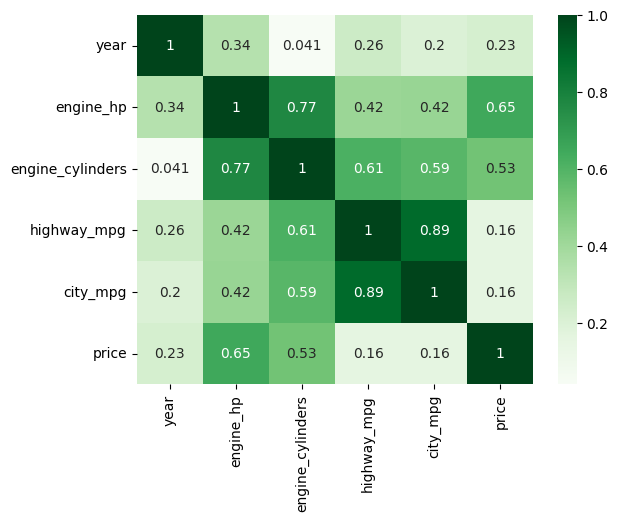

In [946]:
####
# Question 2
# Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

# What are the two features that have the biggest correlation in this dataset?
####

df.dtypes
numerical = [
    'year',
    'engine_hp',
    'engine_cylinders',
    'highway_mpg',
    'city_mpg',
    'price',
]

# Question asks about biggest correlation not postiive or negative correlation, so using `abs()`
corr_matrix = df[numerical].corr().abs()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, cmap='Greens',annot=True)
plt.show()

In [947]:
stacked_corr_matrix = corr_matrix.stack()
# remove 1.0 corr - as that's the diagonal vals - correlation for feature with the feature itself
# and drop duplicates as those are duplicated like feat1  <-> feat2 | feat2 <-> feat1
highest_corr_pairs = stacked_corr_matrix[stacked_corr_matrix < 1].nlargest(10).drop_duplicates()
highest_corr_pairs

# Answer to Q2 - two features with biggest correlation
# highway_mpg       city_mpg            0.886829 


highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
                  price               0.650095
engine_cylinders  highway_mpg         0.614541
                  city_mpg            0.587306
dtype: float64

In [948]:
price_mean = df.price.mean()
print(price_mean)
df['above_average'] = (df.price > price_mean).astype(int)
df.head()

40594.737032063116


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [949]:
from sklearn.model_selection import train_test_split
random_seed = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed)
# get 0.25 of full_train, as that results in 0.2 of original df
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_seed)

In [950]:
len(df_train), len(df_val),len(df_test)

(7148, 2383, 2383)

In [951]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


del df_train["price"]
del df_val["price"]
del df_test["price"]

del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]


In [952]:
####
# Question 3
# Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
# Round the scores to 2 decimals using round(score, 2).
# Which of these variables has the lowest mutual information score?
####
from sklearn.metrics import mutual_info_score
df_train.dtypes
categorical = [
    'make',
    'model',
    'year',
    'transmission_type',
    'vehicle_style',
]
# wrapper because apply only allows for one argument
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

# check mutual info score for each categorical variable against above_average
mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=True).round(2)


# Answer: transmission_type


transmission_type    0.02
year                 0.07
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

In [953]:
####
# Question 4
# Now let's train a logistic regression.
# Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
# Fit the model on the training dataset.
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
# model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
# What accuracy did you get?
####
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
all_features = df_train.columns

def get_model_accuracy(features):

    # no transformation is  added for a numerical variable
    train_dicts = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_pred

    model_accuracy = (y_val == y_pred).mean()
    
    return model_accuracy.round(2)

get_model_accuracy(all_features)

# 0.93

0.93

In [954]:

####
# Question 5
# Let's find the least useful feature using the feature elimination technique.
# Train a model with all these features (using the same parameters as in Q4).
# Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
# For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
# Which of following feature has the smallest difference?
####

all_features = list(df_train.columns)
original_accuracy = get_model_accuracy(all_features)


removed_features = []
without_feature_accuracies = []
for feature in all_features:
    removed_single_feature_list = all_features.copy()
    removed_single_feature_list.remove(feature)
    removed_features.append(feature)

    without_feature_accuracy = get_model_accuracy(removed_single_feature_list)
    without_feature_accuracies.append(without_feature_accuracy)

feature_df = pd.DataFrame(
    {
        "removed_feature": removed_features,
        "without_feature_accuracy": without_feature_accuracies
    }
)
# print(feature_df.head())
feature_df['accuracy_diff'] = (original_accuracy - feature_df['without_feature_accuracy']).abs()
feature_df[
    feature_df['removed_feature'].isin(
        [
            'year',
            'engine_hp',
            'transmission_type',
            'city_mpg'
        ]
    )
].sort_values('accuracy_diff', ascending=True)

# engine_hp

,removed_feature,without_feature_accuracy,accuracy_diff
3,engine_hp,0.93,0.00
2,year,0.95,0.02
5,transmission_type,0.95,0.02
8,city_mpg,0.95,0.02


In [955]:
####
# Question 6
# For this question, we'll see how to use a linear regression model from Scikit-Learn.
# We'll need to use the original column price. Apply the logarithmic transformation to this column.
# Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
# This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
# Round your RMSE scores to 3 decimal digits.
# Which of these alphas leads to the best RMSE on the validation set?
####

In [956]:
from sklearn.linear_model import Ridge
df.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [961]:
random_seed = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed)
# get 0.25 of full_train, as that results in 0.2 of original df
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_seed)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)


del df_train["price"]
del df_val["price"]
del df_test["price"]

del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

In [971]:
from sklearn.metrics import mean_squared_error

for alpha_val in [0, 0.01, 0.1, 1, 10]:
    dv = DictVectorizer()
    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')

    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = Ridge(alpha=alpha_val, solver='sag', random_state=random_seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred).round(2)
    print(f"alpha_value: {alpha_val}, rmse: {rmse}")

# Which of these alphas leads to the best RMSE on the validation set?
# 
# Note: If there are multiple options, select the smallest alpha.
# alpha_value: 0, rmse: 0.06


alpha_value: 0, rmse: 0.06
alpha_value: 0.01, rmse: 0.06
alpha_value: 0.1, rmse: 0.07
alpha_value: 1, rmse: 0.07
alpha_value: 10, rmse: 0.11
